# Read Data

In [1]:
# set up logging
import logging
import logging.config

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
!gdown 1-F7f9oSjFx0Si44DvdkzFhjjwfro_Y1p

Downloading...
From: https://drive.google.com/uc?id=1-F7f9oSjFx0Si44DvdkzFhjjwfro_Y1p
To: /content/train_data.csv
100% 635M/635M [00:06<00:00, 96.3MB/s]


In [4]:
# Load data
train = pd.read_csv('train_data.csv')
print("Data loaded")

Data loaded


In [5]:
train.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


In [6]:
train.describe()

,overall,unixReviewTime
count,838944.000000,8.389440e+05
mean,4.021317,1.483167e+09
std,1.344223,2.229270e+07
min,1.000000,1.451606e+09
25%,3.000000,1.464653e+09
50%,5.000000,1.479254e+09
75%,5.000000,1.499472e+09
max,5.000000,1.538525e+09


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838742 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838869 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


In [8]:
print(train.isnull().sum()/len(train)*100)

overall            0.000000
vote              77.177499
verified           0.000000
reviewTime         0.000000
reviewerID         0.000000
asin               0.000000
style             41.520173
reviewerName       0.024078
reviewText         0.000000
summary            0.008940
unixReviewTime     0.000000
dtype: float64


# Preprocessing

### 1. Converting the review text into a long string:

first of all, concatenates all the review texts from the train dataset into a single string called raw_corpus.

In [9]:
# Convert all the review text into a long string and print its length
raw_corpus = u''.join(train['reviewText']+" ")
print("Raw Corpus contains {0:,} characters".format(len(raw_corpus)))

Raw Corpus contains 524,916,677 characters


### 2. Downloading and loading the punkt tokenizer:

now, uses the Natural Language Toolkit (NLTK) to download the punkt tokenizer, which is a pre-trained tokenizer for English.

In [10]:
# import natural language toolkit
import nltk

# download the punkt tokenizer
nltk.download('punkt')
print("The punkt tokenizer is downloaded")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


The punkt tokenizer is downloaded


### 3. Tokenizing the raw corpus into sentences:

after that loads the tokenizer, now it's time to tokenizes the raw corpus into sentences using the loaded punkt tokenizer. The resulting sentences are stored in the raw_sentences list, and the code prints the number of raw sentences.

In [11]:
# Load the punkt tokenizer
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
print("The punkt tokenizer is loaded")

# we tokenize the raw string into raw sentences
raw_sentences = tokenizer.tokenize(raw_corpus)
print("We have {0:,} raw sentences".format(len(raw_sentences)))

The punkt tokenizer is loaded
We have 6,074,937 raw sentences


### 4. Cleaning and splitting sentences into words:

This code defines a function called clean_and_split_str that removes special characters from a string and splits it into a list of words. It then applies this function to each raw sentence in raw_sentences and builds a list of cleaned sentences called sentences. The code prints the number of clean sentences.

In [12]:
import re

# Clean and split sentence into words
def clean_and_split_str(string):
    strip_special_chars = re.compile("[^A-Za-z]+")
    string = re.sub(strip_special_chars, " ", string)
    return string.strip().split()

In [13]:
# clean each raw sentences and build the list of sentences
sentences = []
for raw_sent in raw_sentences:
    if len(raw_sent) > 0:
        sentences.append(clean_and_split_str(raw_sent))
print("We have {0:,} clean sentences".format(len(sentences)))

We have 6,074,937 clean sentences


In [14]:
print(raw_sentences[1])
print()
print(sentences[1])

The old remote could go head to head and learn.

['The', 'old', 'remote', 'could', 'go', 'head', 'to', 'head', 'and', 'learn']


### 5. Counting the number of tokens:

 This code calculates the total number of tokens in the dataset corpus by summing the lengths of all sentences in sentences. It then prints the token count.

In [15]:
token_count = sum([len(sentence) for sentence in sentences])
print("The dataset corpus contains {0:,} tokens".format(token_count))

The dataset corpus contains 98,273,268 tokens


# Word2Vec

### 6. Setting Word2Vec parameters:

This code sets various parameters for the Word2Vec model, such as the dimensionality of word vectors (num_features), minimum word count threshold (min_word_count), number of parallel workers (num_workers), context window length (context_size), and the seed for reproducibility (seed).

In [21]:
import gensim
from gensim.models import Word2Vec, callbacks

In [17]:
import multiprocessing

#Dimensionality of the resulting word vectors
num_features = 300

#Minimum word count threshold
min_word_count = 2

#Number of threads to run in parallel
num_workers = multiprocessing.cpu_count()

#Context window length
context_size = 10

#Seed for the RNG, to make the result reproducible
seed = 1

In [22]:
# Define a callback to print progress
class callback(callbacks.CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        print(f"Epoch: {self.epoch}")
        self.epoch += 1

In [23]:
model = Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    vector_size=num_features,
    min_count=min_word_count,
    window=context_size,
    callbacks=[callback()])

### 7. Building the vocabulary:

 This code initializes a Word2Vec model with the specified parameters and builds the vocabulary based on the sentences list.

In [24]:
model.build_vocab(sentences)
print("The vocabulary is built")
print("Word2Vec vocabulary length: ", len(model.wv))

The vocabulary is built
Word2Vec vocabulary length:  123874


### 8. Training the Word2Vec model:

 This code trains the Word2Vec model on the sentences data for a specified number of epochs.

In [25]:
#for epoch in tqdm(range(2), unit='epoch', desc='Training'):
#Start training the model
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)
print("Training finished")

Training finished


In [27]:
#Save the model
model.save("model_trained.w2v")
print("Model saved")

Model saved


In [ ]:
#model = Word2Vec.load("model_trained.w2v")

### 9. Accessing word vectors:

 This code demonstrates how to access word vectors for specific words like "guarantee" and "warranty" using the trained Word2Vec model.

In [29]:
model.wv['guarantee']

array([-2.84487963e-01,  3.31140816e-01,  3.64683545e-03,  4.67182487e-01,
        4.38814431e-01,  4.35384596e-03,  8.41035917e-02,  2.81636447e-01,
        2.40669310e-01, -4.85179275e-01,  1.84834197e-01, -1.08073100e-01,
       -1.06564559e-01,  6.30863011e-02, -2.40720674e-01, -5.28391674e-02,
       -4.16897237e-02, -8.93300474e-02, -2.12909997e-01,  8.22590068e-02,
       -2.51310349e-01,  1.75550178e-01, -2.65494853e-01,  2.20485196e-01,
        4.41681862e-01, -3.51893157e-01, -4.66443777e-01, -1.07197762e-01,
        1.02606498e-01,  4.25879985e-01,  8.66236761e-02, -4.08219457e-01,
        2.05815017e-01, -8.57402459e-02, -4.96200621e-02, -1.55240417e-01,
       -3.21695171e-02, -1.08748749e-02, -1.08724289e-01,  1.10432088e-01,
        1.83910459e-01,  3.30199391e-01,  1.40962496e-01,  4.25541326e-02,
        1.88978612e-01, -3.41069341e-01,  2.17599452e-01, -2.43912235e-01,
       -3.48832548e-01,  8.19082931e-02,  3.68453674e-02, -5.38201146e-02,
       -3.79666686e-01,  

In [30]:
model.wv['warranty']

array([-0.11322433,  0.40472823,  0.33961764,  0.17570268,  0.19029996,
        0.14966154, -0.20487052,  0.285083  , -0.05193044, -0.0288015 ,
        0.13886236, -0.60963994, -0.0319281 , -0.16938731,  0.03207734,
        0.08253066,  0.04884907,  0.14381972, -0.18241204, -0.13969567,
       -0.17191494, -0.01977539,  0.2651999 ,  0.08026256,  0.24352252,
       -0.04676777, -0.01844135,  0.10861893,  0.39447096,  0.13268335,
        0.19889851, -0.22393598,  0.31503427, -0.42294535, -0.01229217,
        0.11204702, -0.02864972, -0.20475282,  0.24086097,  0.04543356,
       -0.29968762,  0.21489252, -0.03513754,  0.17894521,  0.5767999 ,
       -0.5227876 ,  0.10558143, -0.04806846, -0.36293304,  0.22943386,
        0.19111976, -0.15442976, -0.44477305,  0.29304504,  0.16134194,
        0.34705466,  0.00408676, -0.01953954, -0.21558589,  0.2326902 ,
       -0.15172556, -0.10834455, -0.38415256,  0.10294395,  0.03917287,
       -0.04176137,  0.09359787, -0.32674077, -0.16793188, -0.10

In [31]:
def plot_embeddings(vectors, labels=None):
    n_vectors = len(vectors)
    fig = plt.figure(figsize=(12, n_vectors))
    # ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    # ax = fig.add_axes([1, 1, 1, 1])
    ax = plt.gca()

    sns.heatmap(vectors, cmap='RdBu', vmax=2, vmin=-2, ax=ax)

    if labels:
        ax.set_yticklabels(labels,rotation=0)
        ax.tick_params(axis='both', which='major', labelsize=30)

    plt.tick_params(axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

    # From https://github.com/mwaskom/seaborn/issues/1773
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!

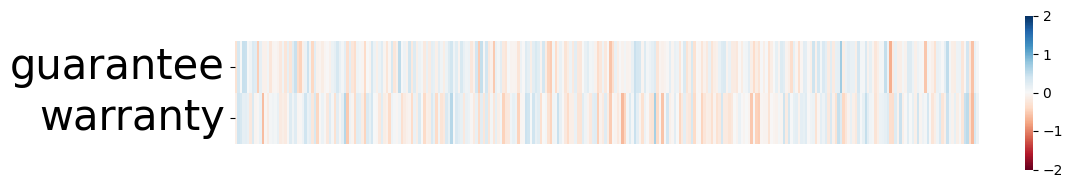

In [35]:
plot_embeddings([model.wv['guarantee'], model.wv['warranty']],
                ['guarantee', 'warranty'])

# Most similar words

### 10. Finding similar words:

 This code finds the most similar words to "guarantee" and "warranty" based on the trained Word2Vec model.

In [36]:
model.wv.most_similar("guarantee", topn=10) # get other similar words

[('guarentee', 0.5842103958129883),
 ('guaranteed', 0.5651603937149048),
 ('guaranty', 0.5629358291625977),
 ('honor', 0.5539951324462891),
 ('warranty', 0.550105631351471),
 ('lifetime', 0.5470574498176575),
 ('promise', 0.5431993007659912),
 ('warrenty', 0.5407271385192871),
 ('commitments', 0.5308763384819031),
 ('honored', 0.528092622756958)]

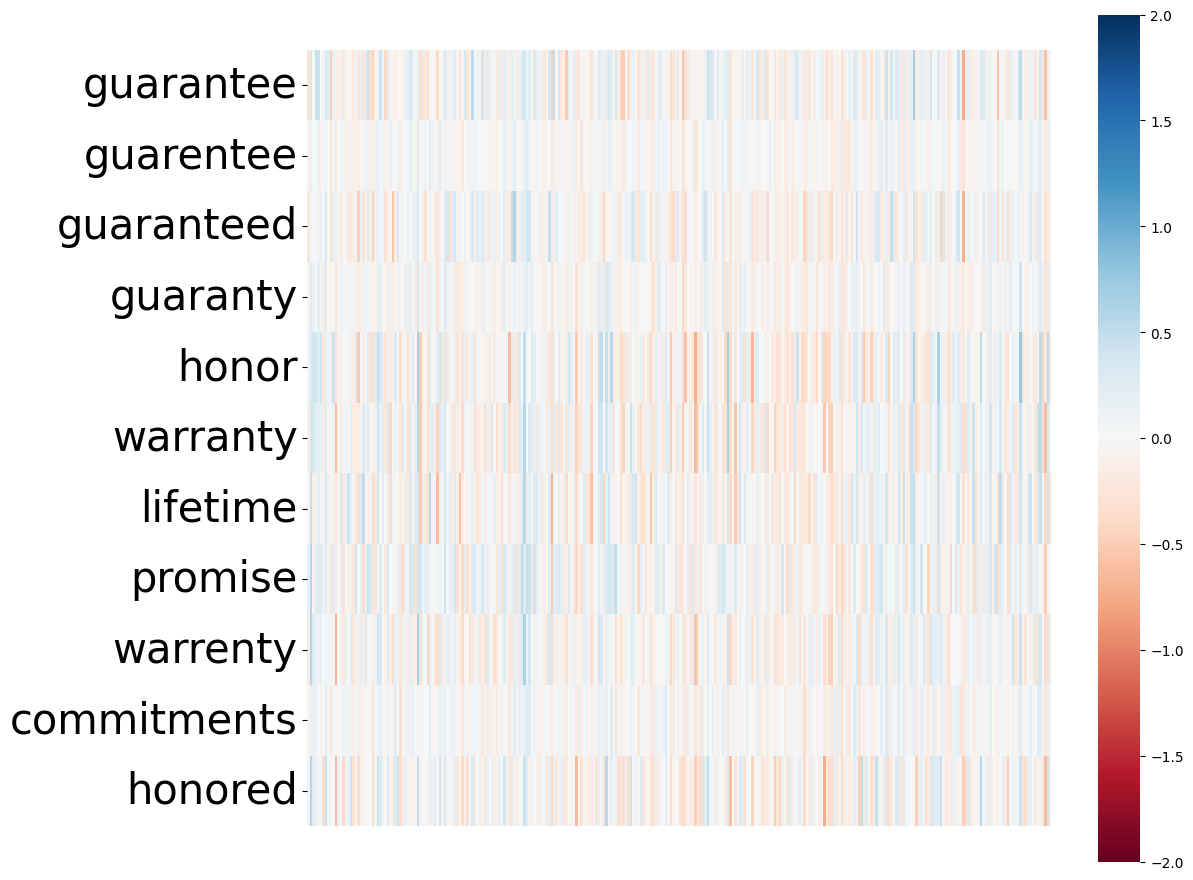

In [38]:
plot_embeddings([model.wv['guarantee'], model.wv['guarentee'], model.wv['guaranteed'], model.wv['guaranty'], model.wv['honor'], model.wv['warranty'], model.wv['lifetime'], model.wv['promise'], model.wv['warrenty'], model.wv['commitments'], model.wv['honored']],
                ['guarantee','guarentee','guaranteed','guaranty','honor','warranty','lifetime','promise','warrenty','commitments','honored'])

In [39]:
model.wv.most_similar('warranty', topn=10) # get other similar words

[('warrantee', 0.7896212935447693),
 ('warrenty', 0.7733485102653503),
 ('warranties', 0.695410430431366),
 ('honor', 0.6833955645561218),
 ('expired', 0.669252872467041),
 ('policy', 0.6426275372505188),
 ('honored', 0.6412009000778198),
 ('warantee', 0.6410559415817261),
 ('lifetime', 0.6396937966346741),
 ('honoring', 0.633973240852356)]

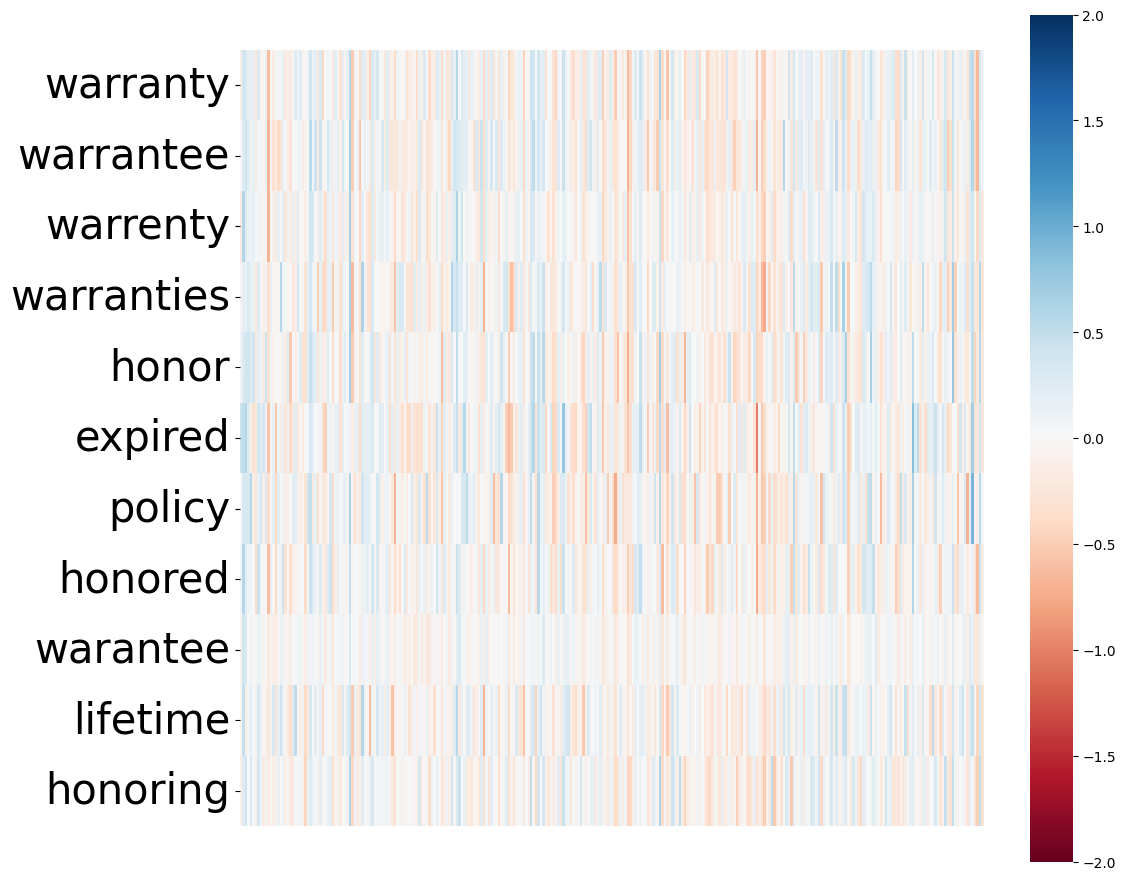

In [40]:
plot_embeddings([model.wv['warranty'], model.wv['warrantee'], model.wv['warrenty'], model.wv['warranties'], model.wv['honor'], model.wv['expired'], model.wv['policy'], model.wv['honored'], model.wv['warantee'], model.wv['lifetime'], model.wv['honoring']],
                ['warranty','warrantee','warrenty','warranties','honor','expired','policy','honored','warantee','lifetime','honoring'])

### 11. Expanding the list of keywords:

This code combines the original keywords with the similar words and removes duplicates to obtain an expanded list of keywords.

In [44]:
keywords = ['guarantee', 'warranty']

similar_words = []
for keyword in tqdm(keywords, total=len(keywords)):
     similar_words += [word for word in model.wv.most_similar(keyword)]
     # Combine the keywords and similar words
keywords += similar_words
#keywords = list(set(keywords))
keywords

100%|██████████| 2/2 [00:00<00:00, 39.70it/s]


['guarantee',
 'warranty',
 ('guarentee', 0.5842103958129883),
 ('guaranteed', 0.5651603937149048),
 ('guaranty', 0.5629358291625977),
 ('honor', 0.5539951324462891),
 ('warranty', 0.550105631351471),
 ('lifetime', 0.5470574498176575),
 ('promise', 0.5431993007659912),
 ('warrenty', 0.5407271385192871),
 ('commitments', 0.5308763384819031),
 ('honored', 0.528092622756958),
 ('warrantee', 0.7896212935447693),
 ('warrenty', 0.7733485102653503),
 ('warranties', 0.695410430431366),
 ('honor', 0.6833955645561218),
 ('expired', 0.669252872467041),
 ('policy', 0.6426275372505188),
 ('honored', 0.6412009000778198),
 ('warantee', 0.6410559415817261),
 ('lifetime', 0.6396937966346741),
 ('honoring', 0.633973240852356)]

In [46]:
elements = []
for item in keywords:
  if isinstance(item, tuple):
        elements.append(item[0])
  else:
        elements.append(item)
print(elements)

['guarantee', 'warranty', 'guarentee', 'guaranteed', 'guaranty', 'honor', 'warranty', 'lifetime', 'promise', 'warrenty', 'commitments', 'honored', 'warrantee', 'warrenty', 'warranties', 'honor', 'expired', 'policy', 'honored', 'warantee', 'lifetime', 'honoring']


### 12. Filtering reviews based on keywords:

 This code filters the reviews in the train['reviewText'] dataset, keeping only the ones that contain at least one of the keywords or similar words. The filtered reviews are stored in the filtered_reviews list.

In [47]:
# Filtering comments that have at least one of keywords or similar_words
filtered_reviews = []
for review in train['reviewText']:
    for element in elements:
        if element in review:
            filtered_reviews.append(review)
            break

In [ ]:
# # Define a function to extract the reviews related to warranty
# def extract_warranty_reviews(text):
#   if not isinstance(text, str):
#     return False

#   for element in elements:
#     if re.search(element, text, re.IGNORECASE):
#       return True

#   return False

# # Apply the function to the reviewText column
# train['warranty_related'] = train['reviewText'].apply(extract_warranty_reviews)

# # Filter the dataset to include only the warranty-related reviews
# warranty_df = train[train['warranty_related'] == True]

# # Calculate the average rating for each product
# product_ratings = warranty_df.groupby('asin')['overall'].mean()

# # Print the results
# print(product_ratings)

In [ ]:
# Get the product ASIN for each review
product_asins = []
for review in filtered_reviews:
  product_asins.append(train.loc[train['reviewText'] == review, 'asin'].values[0])

In [ ]:
# Get the overall rating for each review
overall_ratings = []
for review in filtered_reviews:
  overall_ratings.append(train.loc[train['reviewText'] == review, 'overall'].values[0])

In [ ]:
# Calculate the average rating for each product
average_ratings = {}
for product_asin in set(product_asins):
  ratings = [overall_rating for overall_rating, product_asin2 in zip(overall_ratings, product_asins) if product_asin2 == product_asin]
  if len(ratings) > 0:
    average_ratings[product_asin] = sum(ratings) / len(ratings)

In [ ]:
# Print the average ratings
for product_asin, average_rating in average_ratings.items():
  print(f"Product ASIN: {product_asin}, Average rating: {average_rating}")

In [ ]:
# Get the product ASINs and average ratings
product_asins = list(average_ratings.keys())
average_ratings = list(average_ratings.values())

# Create a line chart
plt.plot(product_asins, average_ratings)

# Add a title and labels
plt.title("Average rating by product ASIN")
plt.xlabel("Product ASIN")
plt.ylabel("Average rating")

# Show the plot
plt.show()

In [ ]:
# # Calculate the average score for each item
# overall_scores = []
# for review in filtered_reviews:
#     overall_score = train.loc[train['reviewText'] == review]['overall'].iloc[0]
#     overall_scores.append(overall_score)

# # Average score report
# print('Average score for product warranty:', round(sum(overall_scores) / len(overall_scores), 2))

In [ ]:
# # Convert the product_ratings Series to a DataFrame
# product_ratings_df = overall_scores.reset_index()

# # Plot the average ratings
# plt.figure(figsize=(10, 6))
# plt.bar(product_ratings_df['asin'], product_ratings_df['overall'])
# plt.xlabel('Product ID')
# plt.ylabel('Average Rating')
# plt.title('Average Rating for Each Product')
# plt.show()

In [ ]:
# # Plot the distribution of the 'overall' column
# plt.hist(train['overall'], bins=5, edgecolor='black')
# plt.title('Distribution of Overall Ratings')
# plt.xlabel('Rating')
# plt.ylabel('Frequency')
# plt.show()

# Visualizing Word2Vec Word Embeddings using t-SNE

In [ ]:
# from sklearn.manifold import TSNE
# rst = TSNE(n_components=3, random_state=0).fit_transform(X[:100])

In [ ]:
# def display_closestwords_tsnescatterplot(model, word):

#     arr = np.empty((0,100), dtype='f')
#     word_labels = [word]

#     # get close words
#     close_words = model.similar_by_word(word)

#     # add the vector for each of the closest words to the array
#     arr = np.append(arr, np.array([model[word]]), axis=0)
#     for wrd_score in close_words:
#         wrd_vector = model[wrd_score[0]]
#         word_labels.append(wrd_score[0])
#         arr = np.append(arr, np.array([wrd_vector]), axis=0)

#     # find tsne coords for 2 dimensions
#     tsne = TSNE(n_components=2, random_state=0)
#     np.set_printoptions(suppress=True)
#     Y = tsne.fit_transform(arr)

#     x_coords = Y[:, 0]
#     y_coords = Y[:, 1]
#     # display scatter plot
#     plt.scatter(x_coords, y_coords)

#     for label, x, y in zip(word_labels, x_coords, y_coords):
#         plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
#     plt.show()

In [ ]:
# display_closestwords_tsnescatterplot(model, 'guarantee')